In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('data/Superstore.csv', encoding='latin-1')


# Mostrar las primeras filas del DataFrame
print(df.head())

# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [12]:
# Verificar valores nulos
print(df.isnull().sum())

# Verificar los valores únicos en la columna de fechas
print(df['Order Date'].unique())

# Convertir la columna a tipo datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
print(df['Order Date'].isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
dtype: int64
<DatetimeArray>
['2016-11-08 00:00:00', '2016-06-12 00:00:00', '2015-10-11 00:00:00',
 '2014-06-09 00:00:00', '2017-04-15 00:00:00', '2016-12-05 00:00:00',
 '2015-11-22 00:00:00', '2014-11-11 00:00:00', '2014-05-13 00:00:00',
 '2014-08-27 00:00:00',
 ...
 '2016-10-11 00:00:00', '2014-06-18 00:00:00', '2017-02-28 00:00:00',
 '2015-05-09 00:00:00', '2014-11-06 00:00:00', '2015-12-29 00:00:00',
 '2014-04-03 00:00:00', '2016-06-03 00:00:00', '2015-04-12 00:00:00',
 '2014-01-21 00:00:00']
Length: 1237, dtype: datetime64[ns]
0


In [13]:
# Verificar los valores únicos en la columna numérica
print(df['Sales'].unique())

# Convertir la columna a tipo numérico
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
print(df['Sales'].isnull().sum())

[261.96  731.94   14.62  ... 437.472  97.98  243.16 ]
0


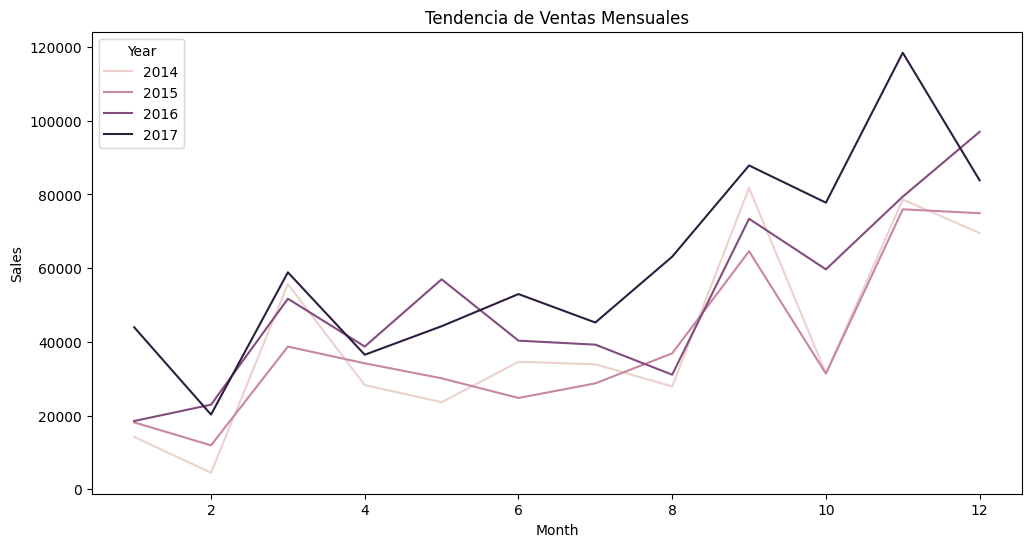

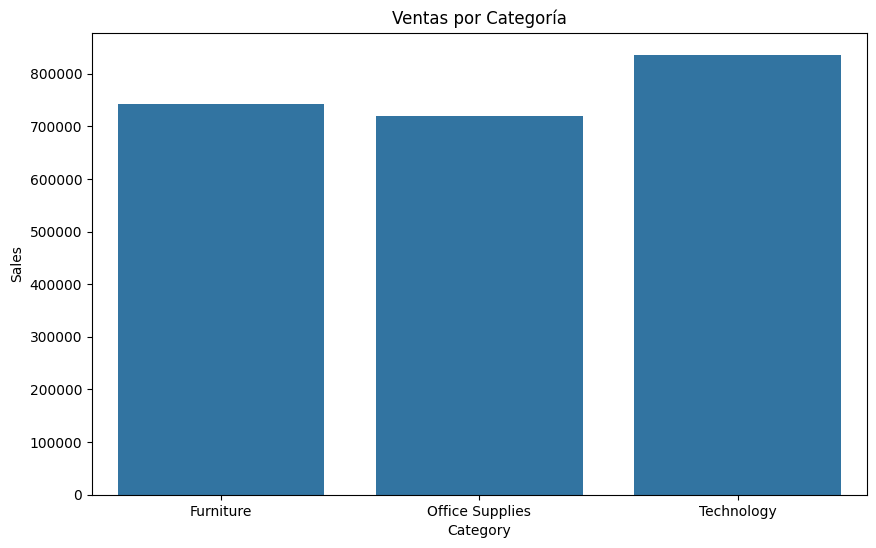

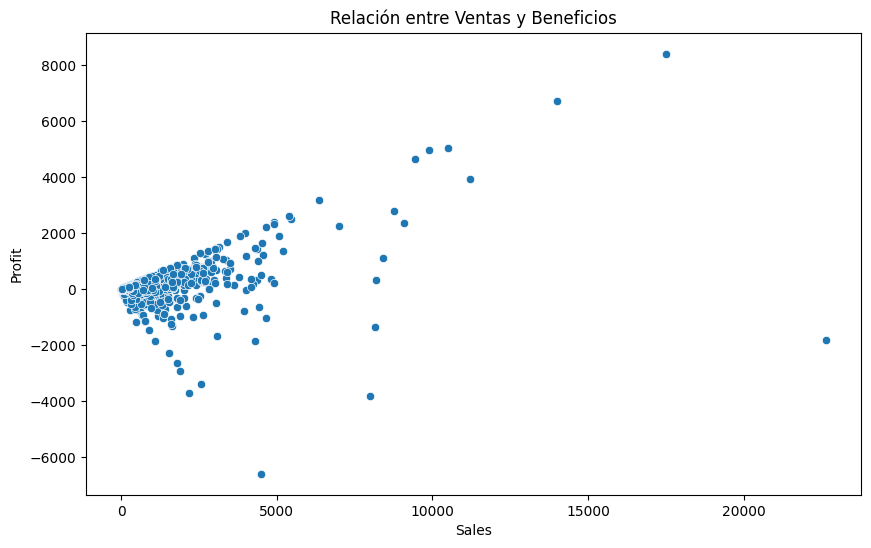

In [10]:
# Tendencia de ventas a lo largo del tiempo
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)
plt.title('Tendencia de Ventas Mensuales')
plt.show()

# Distribución de ventas por categoría
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Ventas por Categoría')
plt.show()

# Relación entre Sales y Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Relación entre Ventas y Beneficios')
plt.show()